#Dataset - 1 (yelp.csv)

In [3]:
import pandas as pd

yelp_raw_data = pd.read_csv("/content/sample_data/yelp.csv")
yelp_raw_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp_raw_data.shape

(10000, 10)

In [6]:
type(yelp_raw_data)

pandas.core.frame.DataFrame

In [7]:
yelp_raw_data['business_id']

0       9yKzy9PApeiPPOUJEtnvkg
1       ZRJwVLyzEJq1VAihDhYiow
2       6oRAC4uyJCsJl1X0WZpVSA
3       _1QQZuf4zZOyFCvXc0o6Vg
4       6ozycU1RpktNG2-1BroVtw
                 ...          
9995    VY_tvNUCCXGXQeSvJl757Q
9996    EKzMHI1tip8rC1-ZAy64yg
9997    53YGfwmbW73JhFiemNeyzQ
9998    9SKdOoDHcFoxK5ZtsgHJoA
9999    pF7uRzygyZsltbmVpjIyvw
Name: business_id, Length: 10000, dtype: object

In [9]:
type(yelp_raw_data['business_id'])

pandas.core.series.Series

##Nominal Level columns

In [10]:
yelp_raw_data['business_id'].describe()

count                      10000
unique                      4174
top       ntN85eu27C04nwyPa8IHtw
freq                          37
Name: business_id, dtype: object

In [11]:
yelp_raw_data['type'].describe()

count      10000
unique         1
top       review
freq       10000
Name: type, dtype: object

In [12]:
duplicate_text = yelp_raw_data['type'].describe()['top']

In [13]:
text_is_the_duplicate = yelp_raw_data['type'] == duplicate_text

In [14]:
type(text_is_the_duplicate)

pandas.core.series.Series

In [15]:
sum(text_is_the_duplicate)

10000

In [16]:
filtered_dataframe = yelp_raw_data[text_is_the_duplicate]

##Ordinal Level columns

In [17]:
yelp_raw_data['stars'].describe()

count    10000.000000
mean         3.777500
std          1.214636
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [18]:
yelp_raw_data['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

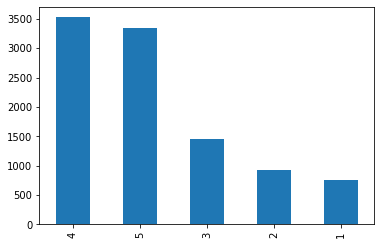

In [19]:
dates = yelp_raw_data['stars'].value_counts()
dates.plot(kind='bar')

#Dataset - 2 (short_titanic.csv)

In [21]:
titanic = pd.read_csv('/content/sample_data/short_titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
titanic.shape

(891, 12)

In [23]:
import numpy as np

In [24]:
titanic['Sex'] = np.where(titanic['Sex']=='female', 1, 0)

In [25]:
titanic['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [26]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
print(sum(titanic['Age'].isnull()))

177


In [29]:
average_age = titanic['Age'].mean()

In [30]:
titanic['Age'].fillna(average_age, inplace = True) 

In [31]:
print(sum(titanic['Age'].isnull()))

0


In [32]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic.groupby('Sex')['Age'].mean()

Sex
0    30.505824
1    28.216730
Name: Age, dtype: float64